# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def ecdf(data) :
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Answers
### Question I - Is the distribution of body temperatures normal?
#### Normality test - Graphical methods Test
    1. Histogram Plot for Temperature

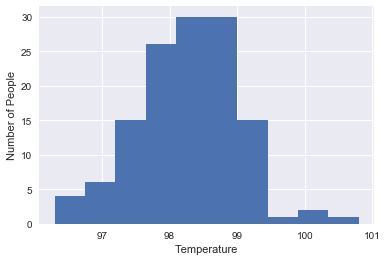

In [59]:
_ = plt.hist(df['temperature'],bins=10)
plt.xlabel('Temperature')
plt.ylabel('Number of People')
plt.show()

     The histogram plot showed below looks like half bell, we are not sure wheather it is or not a normal 
     distribution.
        
    2. Comparing CDF of observed data and theoretical sample data for Temperature 

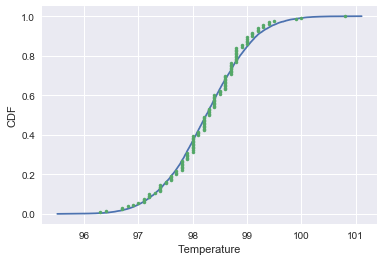

In [60]:
temp = df.temperature.values
temp_mean = np.mean(temp)
temp_std = np.std(temp)
temp_samples = np.random.normal(temp_mean,temp_std,size=10000)

x,y = ecdf(temp)
x_theor,y_theor = ecdf(temp_samples)

sns.set()
plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none')

plt.xlabel('Temperature')
plt.ylabel('CDF')

plt.show()

    From the plot above, we can see that observed data points near perfectly match the normal distribution line of theoretical sample data. We can say that the distribution of body temperature is a normal distribution.
    
### Question II - Is the sample size large? Are the observations independent?
    1. The size of data set
    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


    From the report of info() function, we know the size of the data frame is 130 entries. It is big enough for using Z-test, but too bigger for using T-test.
    
    2. Independence of observations
    There are three variables in this sample data set, 'temperature', 'gender' and 'heart_rate'. Values of those three variables are decided by each person. If there is not any common feature in the group of people such as some disease effecting body temperature and heart rate, then we can have a conclution that those observations are independent to each other.
    
### Question III - Is the true population mean really 98.6 degrees F?
#### Bootstrap Hypothesis test
##### Null Hypothesis - The true population mean is 98.6 degree F.

In [62]:
def diff_from_986(data,true_mean=98.6):
    return np.mean(data) - true_mean

print("Observed mean temperature:", temp_mean)
diff_obs = diff_from_986(temp)
print("Difference between observed mean temperature with 98.6 degree F:",diff_obs)

Observed mean temperature: 98.24923076923075
Difference between observed mean temperature with 98.6 degree F: -0.35076923076924515


Here we use the mean of bootstrap sample minus the 98.6 degree F as the test statistic.

In [116]:
def bootstrap_replicate_1d(data,func):
        return func(np.random.choice(data,size=len(data)))
    
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

temp_shifted = temp - np.mean(temp) + 98.6
temp_bs_replicates = draw_bs_reps(temp_shifted,diff_from_986,10000)

p_value = np.sum(temp_bs_replicates <= diff_obs)/10000
print("P-value is:",p_value)

P-value is: 0.0


Because observed mean temperature is less than 98.6, so we caculate the probability of that the test statistic is less than the difference of observed mean with 98.6 degree F. The p-value result is zero, which just means the p-value is very very small, and if we have many enough bootstrap sample, we can have a value bigger than zero.

The p-value is very small means the null hypothesis is rejected, then we can say that the true population mean from the sample is most likely not 98.6 degree F, or the sample for some particular reason is different from any 130 average sample with true population mean 98.6 degree F.

#### One sample or two sample ?
We will use one-sample test, because we just have one group body temperature data. If we want to do two-sample, we need two groups of observed data. 
#### Z-test or t-test ?
Better sample size for using T-test is less than 30. It looks like we should use Z-test here. But using Z-test needs standard deviation of population. We don't have it now. We have to estimate a standard deviation of population if we want to use Z-test. 

#### T-test
##### Null Hypothesis - The true population mean is 98.6 degree F.

In [125]:
sem = temp_std/len(temp)**0.5
print("Standard Error of Mean:",sem)
t_value = (temp_mean-98.6)/sem
print("t-value:",t_value)

Standard Error of Mean: 0.06405661469519337
t-value: -5.4759252020785585


On the T-table, we can choose to look at the line of 100 degrees of freedom. And from it, we know in area of one tail, if |t-value| >=2.364, then p-value <= 0.01. Our t-value's absolute value is near 5.476 and quite bigger than 2.364. Then We can reject the null hypothesis and have same conclution as that in bootstrap hypothesis test.

#### Z-test
##### Null Hypothesis - The true population mean is 98.6 degree F.
We can use the bootstrap replicates of the sample to caculate standard deviation as true population's. Then we can try Z-test.

In [170]:
std_bs_replicates = draw_bs_reps(temp,np.std,10000)
std_pop = np.mean(std_bs_replicates)
sem_z = std_pop/len(temp)**0.5
print("Standard Error of Mean:",sem_z)
z_statistic = (temp_mean-98.6)/sem_z
print("z_statistic:",z_statistic)

Standard Error of Mean: 0.063619487103003
z_statistic: -5.5135501202852035


The z_statistic is near -5.51. Check the standard normal(z) distribution table, we know that if a z statistic is lower -3.5 then the probability of result at least this extreme is lower than 0.0001. That's small enough to let us reject the null hypothesis. 

### Question IV - Draw a small sample of size 10 from the data and repeat both frequentist tests
#### Small group of sample data with size equal 10.
##### T-test
###### Null Hypothesis - The true population mean is 98.6 degree F.

In [128]:
temp10 = np.random.choice(temp,size=10)
sem10 = np.std(temp10)/len(temp10)**0.5
print("Standard Error of Mean:",sem10)
t_value10 = (np.mean(temp10)-98.6)/sem10
print("t-value:",t_value10)

Standard Error of Mean: 0.17821335527956333
t-value: -1.5711504873512474


The SEM of the samll size sample is near triple times of original sample, and T-value's absolute value is 1.571. We can look at the line with 9 degrees freedom on T-table, and find 1.833>1.571>1.383, which means that the p-value of this frequentist statistical test is between 0.05 and 0.10. The p-value let us cannot reject the null hypothesis.

#### Z-test
##### Null Hypothesis - The true population mean is 98.6 degree F.

In [172]:
sem10_z = std_pop/len(temp10)**0.5
print("Standard Error of Mean:",sem10_z)
z_statistic_10 = (np.mean(temp10)-98.6)/sem10_z
print("Z-statistic:",z_statistic_10)

Standard Error of Mean: 0.22938332286859725
Z-statistic: -1.220664155085004


This time the Z-statistic is near -1.22, and after checking the standard normal(z) distribution table, we know the probability of result at least this extreme is 0.1112, which let us cannot reject the null hypothesis. 

#### Which is better for samll size sample?
If we know the mean and standard deviation of population, and our sample size is larger than 30, then we should use Z-test. Ohterwise we should use T-test. For this case, our sample size is 10, then we'd better use T-test.

### Question V - At what temperature should we consider someone's temperature to be "abnormal"?


As previous example, we will use small size which is 25 to simulate sample drawn 10000 times to calculate the 95% confidence interval of margin error and mean. Then we can have a confidence interval of normal body temperature, and then know at what temperature we consider someone's temperature to be "abnormal".

Because we don't know the true mean and true standard deviation of population, so we will use t-value to caculate margin error. For 95% confidence interval and 24 degrees freedom, the critical t-value on the t distribution table is nearly 2.064.

In [163]:
def get_margin_95(data):
    return 2.064*np.std(data)/len(data)**0.5

def bootstrap_replicate_1d_25(data,func):
        return func(np.random.choice(data,size=25))
    
def draw_bs_reps_25(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d_25(data,func)
    return bs_replicates

In [164]:
mr_bs_replicates = draw_bs_reps_25(temp,get_margin_95,10000)
max_mr = np.max(mr_bs_replicates)
print("Maximum Margin Error is ",max_mr)
bs_replicates = draw_bs_reps_25(temp,np.mean,10000)
conf_intvl = np.percentile(bs_replicates,[2.5,97.5])
print("95% confidence interval of mean body temperature :",conf_intvl)
print("When body temperature is lower than ",np.min(conf_intvl)-max_mr," degree F, or higher than ",np.max(conf_intvl)+max_mr," degree F, it is abnormal.")

Maximum Margin Error is  0.5014702827256662
95% confidence interval of mean body temperature : [97.956 98.536]
When body temperature is lower than  97.45452971727435  degree F, or higher than  99.03747028272566  degree F, it is abnormal.


### Question VI - Is there a significant difference between males and females in normal temperature?

In [167]:
def normal_temp(data):
    mr_bs_replicates = draw_bs_reps_25(data,get_margin_95,10000)
    max_mr = np.max(mr_bs_replicates)
    bs_replicates = draw_bs_reps_25(data,np.mean,10000)
    conf_intvl = np.percentile(bs_replicates,[2.5,97.5])
    return (np.min(conf_intvl)-max_mr,np.max(conf_intvl)+max_mr)

In [169]:
temp_male = df.temperature.values[df.gender == 'M']
temp_female = df.temperature.values[df.gender == 'F']

male_min,male_max = normal_temp(temp_male)
female_min,female_max = normal_temp(temp_female)

print("Male Normal Temperature Range: ",male_min," - ",male_max)
print("Female Normal Temperature Range: ",female_min," - ",female_max)
print("Female's lowest normal temperature is usually higher than male's by ",female_min-male_min," degree F")
print("Female's highest normal temperature is usually higher than male's by ",female_max-male_max," degree F")


Male Normal Temperature Range:  97.39759071919599  -  98.80240928080404
Female Normal Temperature Range:  97.59265025868613  -  99.19534974131385
Female's lowest normal temperature is usually higher than male's by  0.19505953949014554  degree F
Female's highest normal temperature is usually higher than male's by  0.3929404605098057  degree F


From results calculated above, we know that female's lowest normal temperature is nearly 0.195 degree F higher than male's, and female's highest normal temperature is nearly 0.393 degree F higher than male's.

### Conclution

In practical cases, we often face this sort of situation that we just have a few small size samples, and we don't know the true statistics of population such as mean and standard deviation. Using bootstrap methods can be helpful to simulate randomly drawing samples, thus we can use those replicates and statistical inference methods such as T-test to calculate some important test statistics' distributions which are closer to true statistics of population.

In addition, sample drawing bias is a quite critical issue. Like this 130 body temperature sample, it obviously has some bias on drawing lower body temperature samples under 98.6 F is the true mean of population on body temperature. More randomly sample may help adjust some potential bias. 